In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

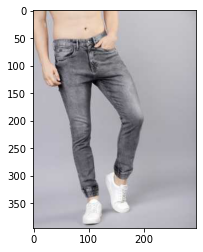

In [3]:
pic=image.load_img(r"C:\Users\RAJSHREE\Downloads\Assign. 3\train\Jeans_File\img_13.jpeg")
plt.imshow(pic)

In [4]:
cv2.imread(r"C:\Users\RAJSHREE\Downloads\Assign. 3\train\Jeans_File\img_13.jpeg")

array([[[154, 174, 205],
        [156, 176, 207],
        [159, 179, 210],
        ...,
        [180, 175, 176],
        [179, 174, 175],
        [178, 173, 174]],

       [[154, 174, 205],
        [156, 176, 207],
        [160, 180, 211],
        ...,
        [180, 175, 176],
        [179, 174, 175],
        [178, 173, 174]],

       [[155, 175, 206],
        [157, 177, 208],
        [160, 180, 211],
        ...,
        [181, 176, 177],
        [180, 175, 176],
        [179, 174, 175]],

       ...,

       [[193, 185, 186],
        [193, 185, 186],
        [193, 185, 186],
        ...,
        [176, 168, 169],
        [175, 167, 168],
        [175, 167, 168]],

       [[193, 185, 186],
        [193, 185, 186],
        [193, 185, 186],
        ...,
        [176, 168, 169],
        [175, 167, 168],
        [175, 167, 168]],

       [[193, 185, 186],
        [193, 185, 186],
        [193, 185, 186],
        ...,
        [176, 168, 169],
        [175, 167, 168],
        [175, 167, 168]]

In [5]:
cv2.imread(r"C:\Users\RAJSHREE\Downloads\Assign. 3\train\Jeans_File\img_13.jpeg").shape

(395, 296, 3)

In [6]:
train= ImageDataGenerator(rescale=1/255)
validation= ImageDataGenerator(rescale=1/255)

In [8]:
train_dataset=train.flow_from_directory(r"C:\Users\RAJSHREE\Downloads\Assign. 3\train",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

validation_dataset=train.flow_from_directory(r"C:\Users\RAJSHREE\Downloads\Assign. 3\validation",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

Found 960 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'Jeans_File': 0, 'Trousers_File': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
# Model Fit

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
    
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
    
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
    
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(240, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['accuracy'])

In [14]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=20,
                   epochs=15,
                   validation_data=validation_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 10 steps
Epoch 1/15
20/20 [==============================] - 25s 1s/step - loss: 0.9724 - accuracy: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.4333
Epoch 2/15
20/20 [==============================] - 9s 473ms/step - loss: 0.7120 - accuracy: 0.5167 - val_loss: 0.6881 - val_accuracy: 0.7000
Epoch 3/15
20/20 [==============================] - 9s 455ms/step - loss: 0.7908 - accuracy: 0.5833 - val_loss: 0.8264 - val_accuracy: 0.5000
Epoch 4/15
20/20 [==============================] - 9s 431ms/step - loss: 0.7379 - accuracy: 0.4667 - val_loss: 0.6871 - val_accuracy: 0.5000
Epoch 5/15
20/20 [==============================] - 9s 460ms/step - loss: 0.6968 - accuracy: 0.5000 - val_loss: 0.6897 - val_accuracy: 0.5667
Epoch 6/15
20/20 [==============================] - 9s 450ms/step - loss: 0.7022 - accuracy: 0.5000 - val_loss: 0.6873 - val_accuracy: 0.5333
Epoch 7/15
20/20 [==============================] - 9s 462

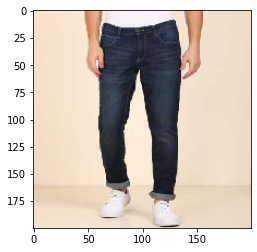

jeans


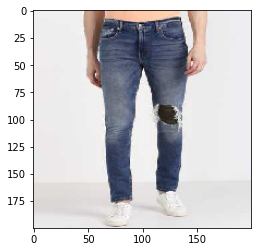

trouser


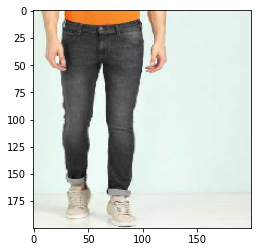

jeans


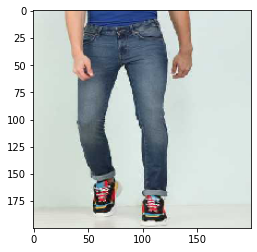

jeans


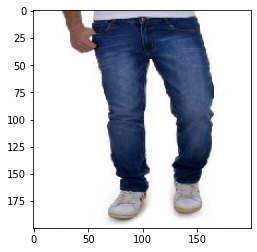

jeans


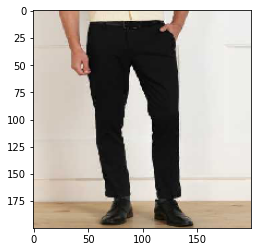

jeans


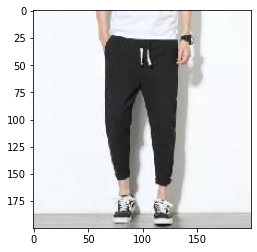

trouser


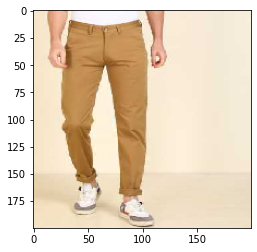

trouser


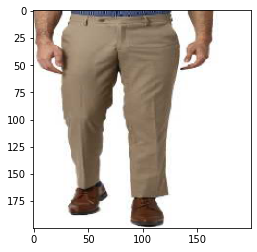

jeans


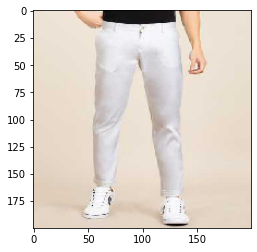

trouser


In [15]:
dir_path=(r"C:\Users\RAJSHREE\Downloads\Assign. 3\test")
for i in os.listdir(dir_path):
    pic=image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(pic)
    plt.show()
    
    X= image.img_to_array(pic)
    X= np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    
    if val==0:
        print("jeans")
    else:
        print("trouser")